# Authoring and Editing WebMaps
-----------------------------------------------


## Authoring a WebMap 2 ways:


### Connect to our GIS

In [1]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap

gis = GIS(profile="your_online_profile")

### Getting the layers we will add:

In [2]:
items = gis.content.search("Cougar Habitat, owner:your_username", item_type="Feature Layer")
items

[<Item title:"Cougar_Habitat" type:Feature Layer Collection owner:your_username>]

<Item title:"Cougar_Habitat" type:Feature Layer Collection owner:your_username>
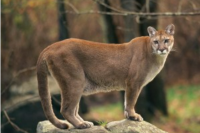

In [3]:
cougar_item = items[0]
cougar_item

In [4]:
cougar_item.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/0">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/1">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/2">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/3">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/4">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/5">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/6">,
 <FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/7">]

### 1) With the WebMap Class

In [ ]:
new_webmap = WebMap()
new_webmap

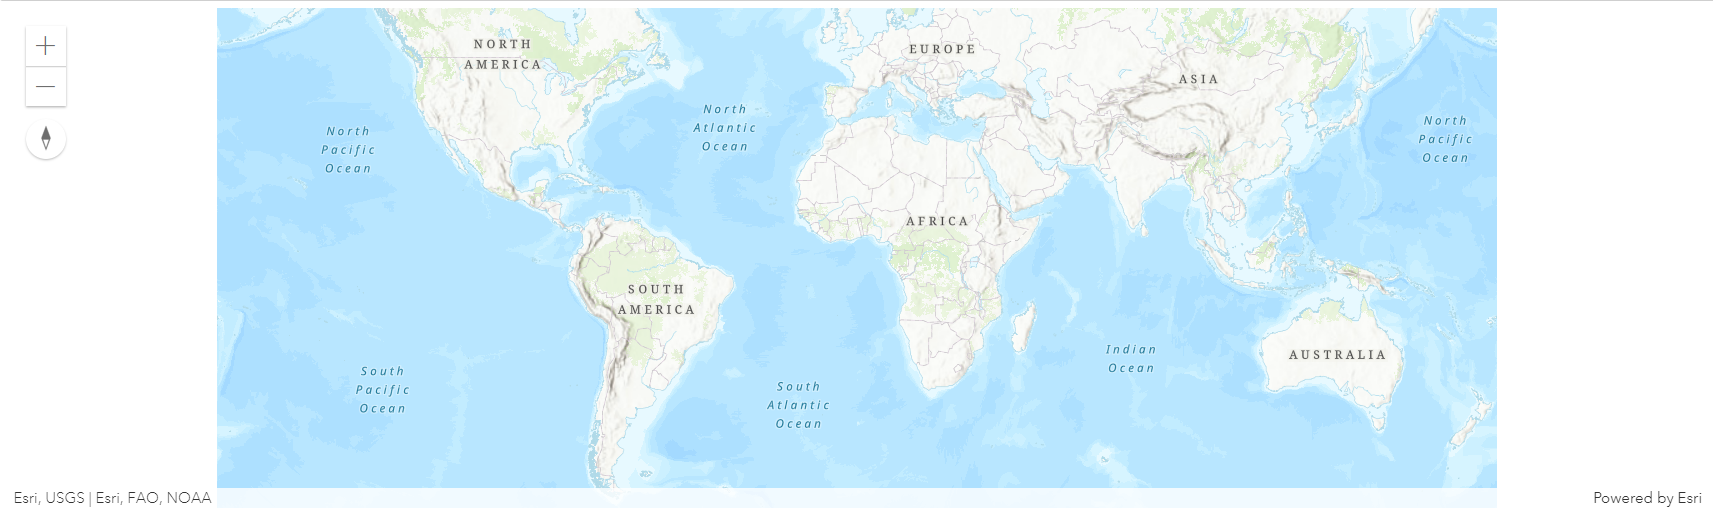

In [7]:
for layer in cougar_item.layers:
    new_webmap.add_layer(layer)

In [ ]:
test_wm

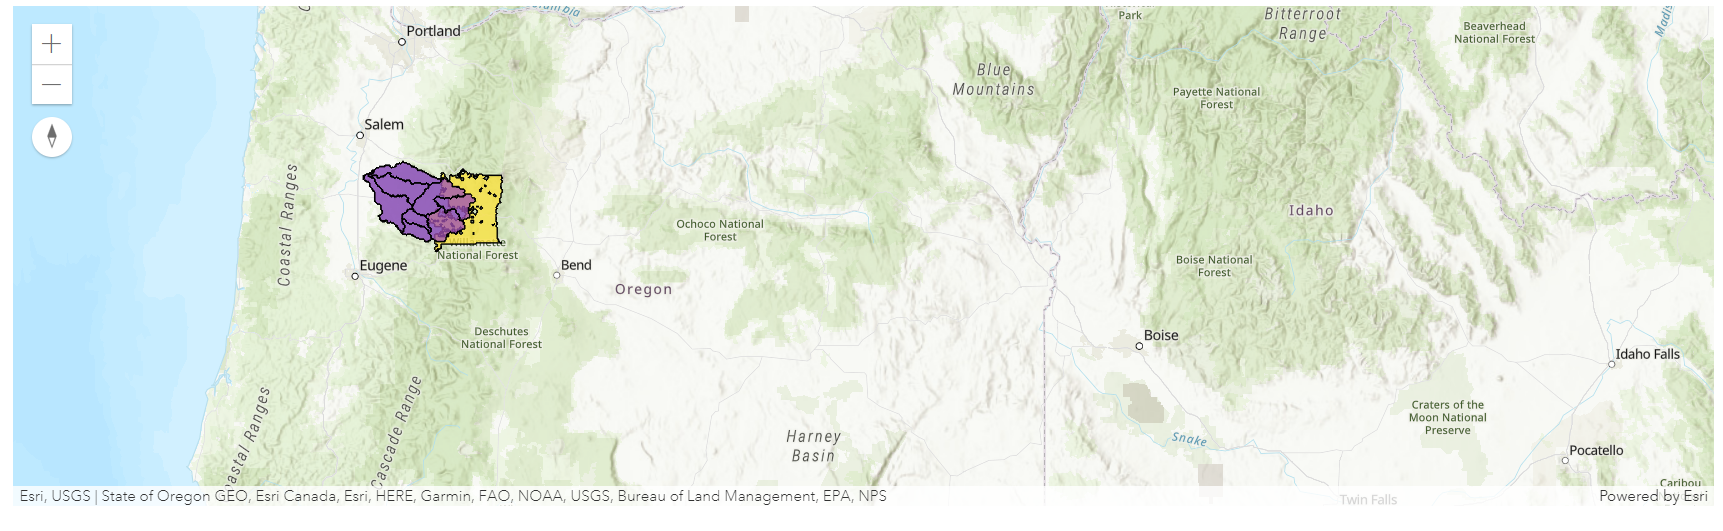

In [8]:
properties = {"title": "Cougar Habitat Map Using WebMap", "tags": ["python", "example"], "snippet": "A map of cougar habitats created with the WebMap class"}
test_wm = new_webmap.save(item_properties=properties)
test_wm

<Item title:"Cougar Habitat Map Using WebMap" type:Web Map owner:your_username>

### 2) With the MapView Class: gis.map()

In [9]:
my_map = gis.map("Oregon") #can pass in the extent
type(my_map)

arcgis.widgets._mapview._mapview.MapView

In [ ]:
my_map

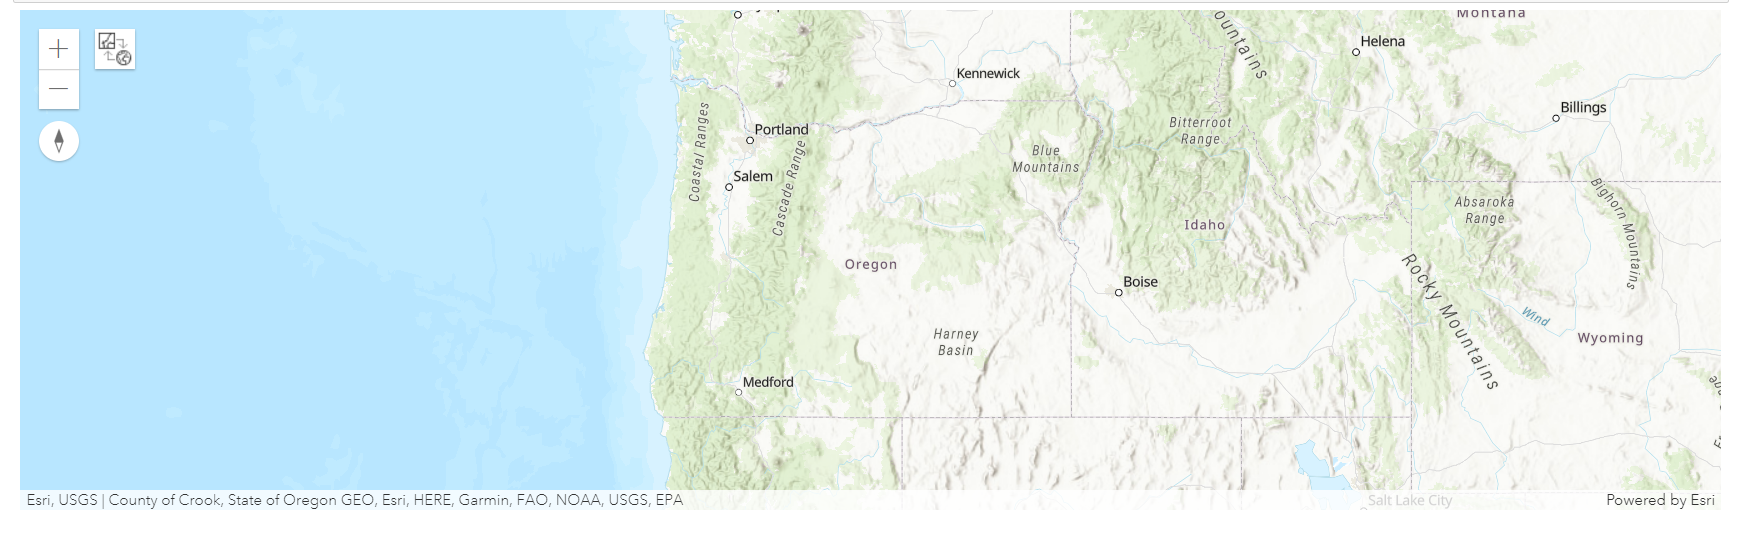

In [12]:
for layer in cougar_item.layers:
    my_map.add_layer(layer)

In [ ]:
webmap_item

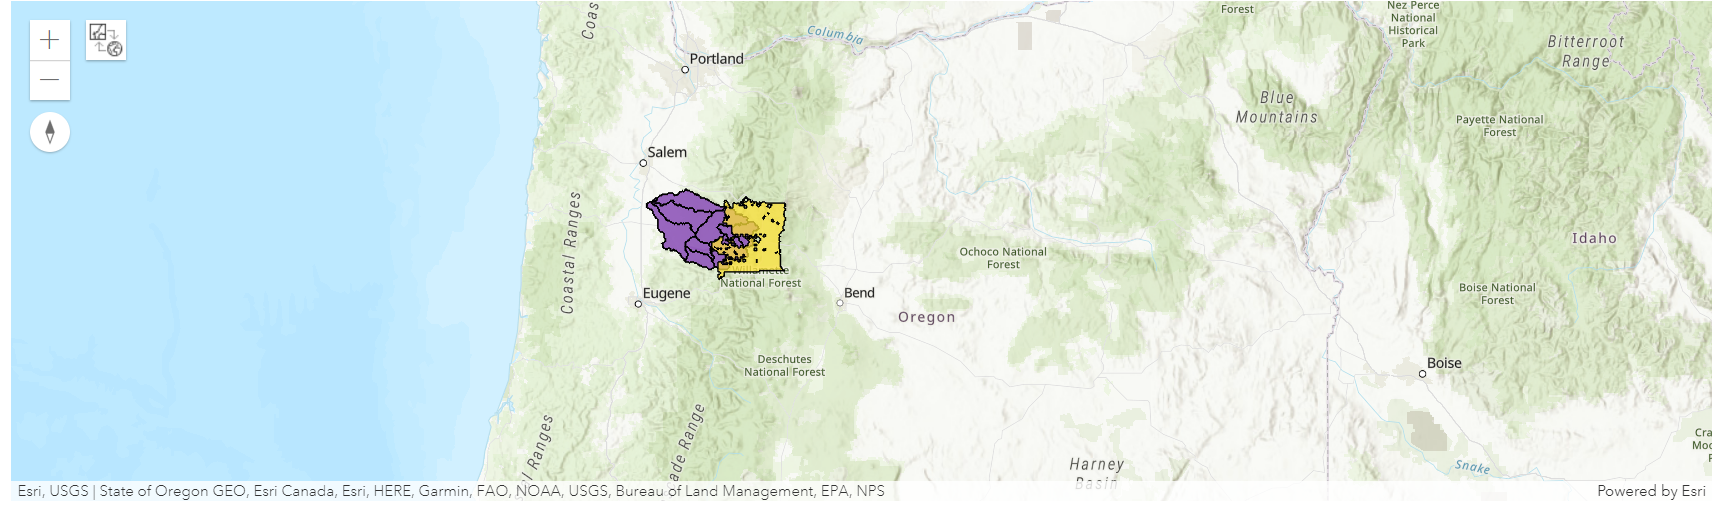

In [13]:
properties = {"title": "Cougar Habitat Map Using MapView", "tags": ["python", "example"], "snippet": "A map of cougar habitats created with the gis.map() method"}
webmap_item = my_map.save(item_properties=properties)
webmap_item

<Item title:"Cougar Habitat Map Using MapView" type:Web Map owner:your_username>

## Editing the WebMap

### Search our Items

In [14]:
# Search for our WebMap Items
items = gis.content.search("Cougar Habitats, owner:your_username", item_type="Web Map")
items

[<Item title:"Cougar Habitats" type:Web Map owner:your_username>,
 <Item title:"Cougar Habitat Map Using MapView" type:Web Map owner:your_username>,
 <Item title:"Cougar Habitat Map Using WebMap" type:Web Map owner:your_username>]

In [15]:
# Get the webmap we will edit
webmap_item = items[2]
webmap_item

<Item title:"Cougar Habitat Map Using WebMap" type:Web Map owner:your_username>

### Create a WebMap Object from an Existing WebMap Item

In [ ]:
webmap = WebMap(webmap_item)
webmap

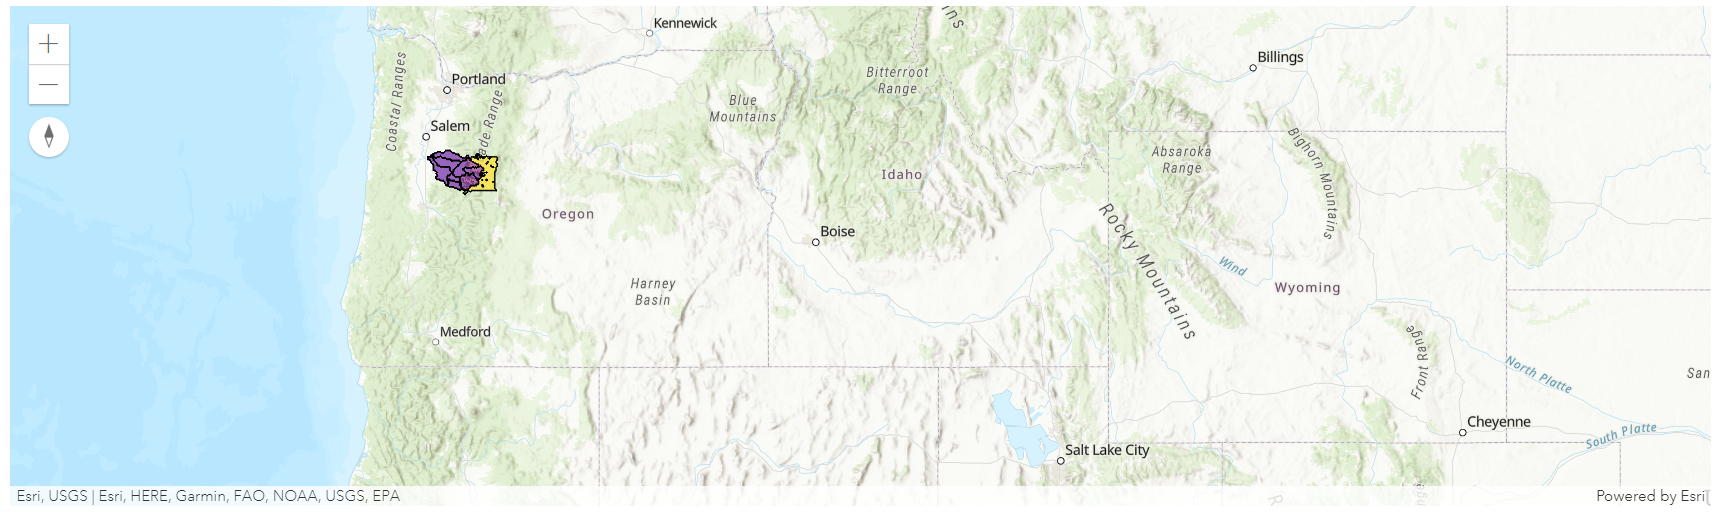

------------------------------------------------------
### Looking at the Basemap Property

In [17]:
webmap.basemap

{
  "id": "588f0e0acc514c11bc7c898fed9fc651",
  "title": "Topographic",
  "baseMapLayers": [
    {
      "id": "World_Hillshade_3689",
      "layerType": "ArcGISTiledMapServiceLayer",
      "opacity": 1,
      "title": "World Hillshade",
      "url": "https://services.arcgisonline.com/arcgis/rest/services/Elevation/World_Hillshade/MapServer",
      "visibility": true
    },
    {
      "id": "VectorTile_6451",
      "layerType": "VectorTileLayer",
      "opacity": 1,
      "styleUrl": "https://cdn.arcgis.com/sharing/rest/content/items/7dc6cea0b1764a1f9af2e679f642f0f5/resources/styles/root.json",
      "title": "World Topographic Map",
      "type": "VectorTileLayer",
      "visibility": true
    }
  ],
  "operationalLayers": []
}

In [18]:
webmap.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

### Editing the Basemap

In [19]:
webmap.basemap = "hybrid"

In [ ]:
webmap

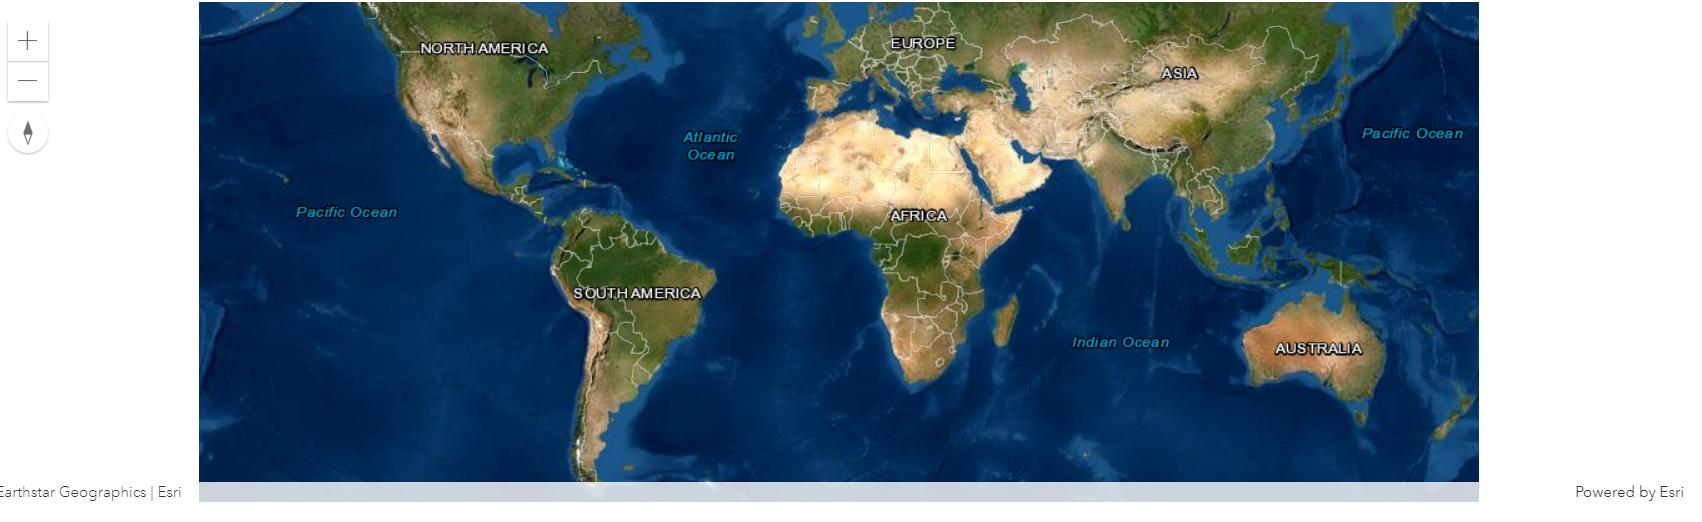

------------------------------------------------------
### Editing Pop Ups

You asked and we listened: There is a new method to configure pop ups in the Web Map!  



### Before:
 
layer_1.popupInfo.fieldInfos[0].visible = False  

#### Why is this inconvenient? If you have more than 5 fields, this becomes tedious

------------------------------------------------------   

### Now:    

1) Find which layer you want to configure

In [21]:
for layer in webmap.layers:
    print(layer["title"])

vegetation
sub_watershed
steep_slope
state_park
national_forest
major_watershed
stream
highway


In [23]:
national_forest = webmap.get_layer(title="national_forest")
national_forest.popupInfo

{
  "title": "national_forest",
  "fieldInfos": [
    {
      "fieldName": "FID",
      "label": "FID",
      "isEditable": false,
      "visible": true
    },
    {
      "fieldName": "objectid_1",
      "label": "objectid_1",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "objectid_2",
      "label": "objectid_2",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "objectid",
      "label": "objectid",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "db_s1tbu_h",
      "label": "db_s1tbu_h",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "perimeter",
      "label": "perimeter",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "owner_code",
      "label": "owner_code",
      "isEditable": true,
      "visible": true
    },
    {
      "fieldName": "owner_name",
      "label": "owner_name",
      "isEditable": true,
      "visible

2) Find the field names that show up in the pop up for the **National Forest** layer

In [24]:
fields = []
for field in national_forest.popupInfo.fieldInfos:
    fields.append(field["fieldName"])

3) Remove the field we want to keep as visible: **perimiter**

In [25]:
fields.remove("perimeter")
fields

['FID',
 'objectid_1',
 'objectid_2',
 'objectid',
 'db_s1tbu_h',
 'owner_code',
 'owner_name',
 'st_area_sh',
 'st_length_',
 'Shape__Area',
 'Shape__Length']

4) Configure the pop ups using: **configure_pop_ups()**

What are we doing?  
- Specifying the layer we want to apply this to
- Specifying the list of field names that we want this to apply to
- Specifying whether these fields will be visible (True) or not visible (False)

In [26]:
# Here we set our fields to false visibility
webmap.configure_pop_ups(layer_title=national_forest.title, field_names=fields, visibility=False)

{
  "title": "national_forest",
  "opacity": 1,
  "visibility": true,
  "id": "f396d1d9-174c-4621-acd4-12a301524449",
  "layerDefinition": {
    "definitionExpression": null,
    "drawingInfo": {
      "renderer": {
        "type": "simple",
        "symbol": {
          "type": "esriSFS",
          "style": "esriSFSSolid",
          "color": [
            252,
            225,
            56,
            191
          ],
          "outline": {
            "type": "esriSLS",
            "style": "esriSLSSolid",
            "color": [
              0,
              0,
              0,
              255
            ],
            "width": 0.75
          }
        }
      }
    }
  },
  "layerType": "ArcGISFeatureLayer",
  "itemId": "747b24cdf0ef49acab79feb3dfcd4546",
  "url": "https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/Cougar_Habitat/FeatureServer/3",
  "popupInfo": {
    "title": "national_forest",
    "fieldInfos": [
      {
        "fieldName": "FID",
        "

### To make sure all these changes are registered, we update!

In [27]:
webmap.update()

True

#### Let's view what we saved

In [29]:
webmap_item = gis.content.search("Cougar Habitats, owner:your_username", item_type="Web Map")[2]
wm = WebMap(webmap_item)
wm

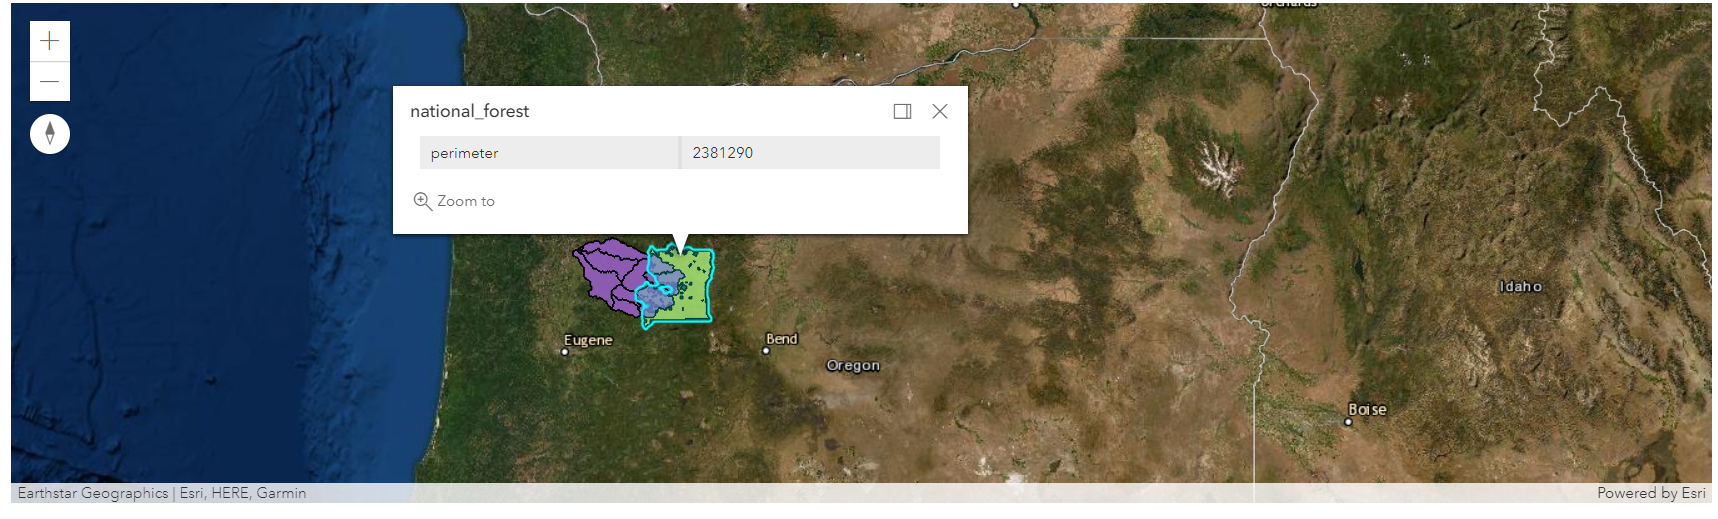